In [1]:
import os

import pandas as pd

from utils.plot import *

from ESG.config import TEST_DATA_DIR, RAW_DATA_DIR, FIGURE_DIR

In [2]:
new_score_df = pd.read_csv(os.path.join(TEST_DATA_DIR, 'scores_new.csv'), dtype={'STOCK_CODE': str})
new_score_df = new_score_df[['STOCK_CODE', 'E_SCORE', 'S_SCORE', 'G_SCORE', 'ESG_SCORE']]
new_score_df['STOCK_CODE'] = new_score_df['STOCK_CODE'].apply(lambda x: '0' * (6-len(x)) + x)
new_score_df = new_score_df.sort_values(by=['STOCK_CODE']).reset_index(drop=True)

In [3]:
zz_800_df = pd.read_csv(os.path.join(r"D:\QuantData\指数", '中证800指数（2017-2019）.csv'), parse_dates=['DATETIME'])
zz_800_df = zz_800_df[zz_800_df['DATETIME'].apply(lambda x: x.year == 2019)]
zz_800_close = pd.read_csv(os.path.join(r"D:\QuantData\中证800成分股", '中证800股收盘价（2017-2019）.csv'))
zz_800_close = zz_800_close.loc[:, [c for c in zz_800_close.columns if c == 'STOCK_CODE' or c.split('-')[0]=='2019']]
zz_800_fs = pd.read_csv(os.path.join(r"D:\QuantData\中证800成分股", '中证800股自由流通市值（2017-2019）.csv'))
zz_800_fs = zz_800_fs.loc[:, [c for c in zz_800_fs.columns if c == 'STOCK_CODE' or c.split('/')[-1]=='2019']]

new_score_df['STOCK_CODE'] = zz_800_close['STOCK_CODE'].copy()
dates = pd.to_datetime(zz_800_df['DATETIME'])

In [4]:
factor_scores = zz_800_close[['STOCK_CODE']].copy()

for d in dates:
    factor_scores.loc[:, d._date_repr] = new_score_df.loc[:, 'ESG_SCORE'].values

C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


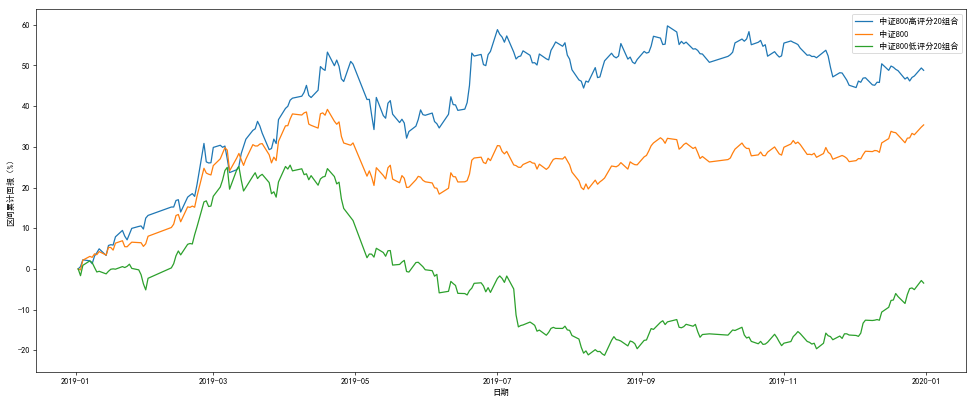

In [5]:
from factor.test import fs_weighted_top_factor_return_rate

plt.figure(figsize=(20, 8), dpi=60)
fs_weighted_top_factor_return_rate(factor_scores, zz_800_fs, zz_800_close, zz_800_df, mname='中证800')
plt.savefig(os.path.join(FIGURE_DIR, "中证800ESG投资组合累计收益.png"))

In [8]:
new_sz_score_df = pd.read_csv(os.path.join(TEST_DATA_DIR, 'scores_new_300.csv'), dtype={'STOCK_CODE': str})
new_sz_score_df = new_sz_score_df[['STOCK_CODE', 'E_SCORE', 'S_SCORE', 'G_SCORE', 'ESG_SCORE']]
new_sz_score_df['STOCK_CODE'] = new_sz_score_df['STOCK_CODE'].apply(lambda x: '0' * (6-len(x)) + x)
new_sz_score_df = new_sz_score_df.sort_values(by=['STOCK_CODE']).reset_index(drop=True)

In [9]:
mask = (zz_800_close['STOCK_CODE'].apply(lambda x: x.split('.')[0] in new_sz_score_df['STOCK_CODE'].values))
sz_300_df = pd.read_excel(os.path.join(r"D:\QuantData\指数", '沪深300指数（2019）.xlsx'), sheet_name='Sheet1', parse_dates=['DATETIME'])
sz_300_close = zz_800_close.loc[mask, :].copy().reset_index(drop=True)
sz_300_fs = zz_800_fs.loc[mask, :].copy().reset_index(drop=True)

new_sz_score_df['STOCK_CODE'] = sz_300_close['STOCK_CODE'].copy()
dates = pd.to_datetime(sz_300_df['DATETIME'])

In [11]:
factor_scores = sz_300_close[['STOCK_CODE']].copy()

for d in dates:
    factor_scores.loc[:, d._date_repr] = new_sz_score_df.loc[:, 'ESG_SCORE'].values

C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\10915\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


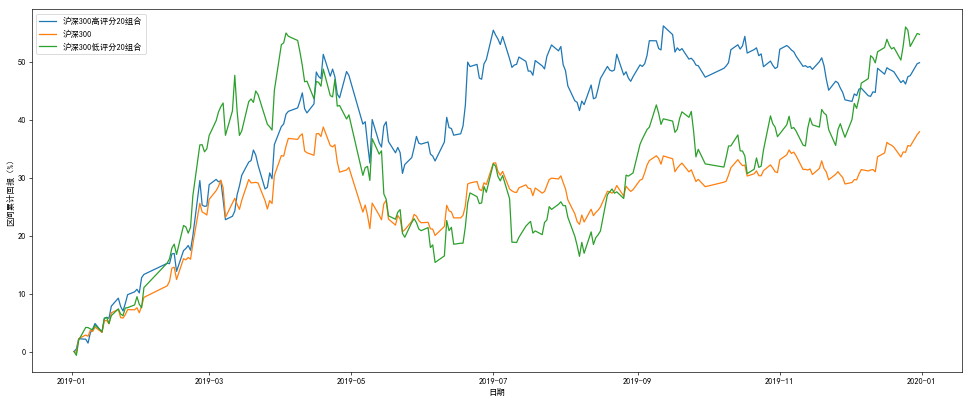

In [12]:
from factor.test import fs_weighted_top_factor_return_rate

plt.figure(figsize=(20, 8), dpi=60)
fs_weighted_top_factor_return_rate(factor_scores, sz_300_fs, sz_300_close, sz_300_df, mname='沪深300')
plt.savefig(os.path.join(FIGURE_DIR, "沪深300ESG投资组合累计收益.png"))
